## Load data

In [48]:
import pandas as pd

file_path = r".\GSE54416_data.txt"

columns_to_keep = ['Symbol', 'ECFC_L1_Mock_1.raw', 'ECFC_L1_Mock_2.raw', 'ECFC_L1_Mock_3.raw',
                   'ECFC_L2_Mock_1.raw', 'ECFC_L2_Mock_2.raw', 'ECFC_L2_Mock_3.raw', 
                   'ECFC_B1_Mock_1.raw', 'ECFC_B1_Mock_2.raw',	'ECFC_B1_Mock_3.raw',	
                   'ECFC_B2_Mock_1.raw', 'ECFC_B2_Mock_2.raw',	'ECFC_B2_Mock_3.raw']

counts = pd.read_csv(file_path, usecols=columns_to_keep, sep='\t')

counts.rename(columns={'ECFC_L1_Mock_1.raw': 'ECFC-L1-rep1', 
                       'ECFC_L1_Mock_2.raw': 'ECFC-L1-rep2', 
                       'ECFC_L1_Mock_3.raw': 'ECFC-L1-rep3',
                       'ECFC_L2_Mock_1.raw': 'ECFC-L2-rep1', 
                       'ECFC_L2_Mock_2.raw': 'ECFC-L2-rep2', 
                       'ECFC_L2_Mock_3.raw': 'ECFC-L2-rep3',
                       'ECFC_B1_Mock_1.raw': 'ECFC-B1-rep1',
                       'ECFC_B1_Mock_2.raw': 'ECFC-B1-rep2',
                       'ECFC_B1_Mock_3.raw': 'ECFC-B1-rep3',
                       'ECFC_B2_Mock_1.raw': 'ECFC-B2-rep1',
                       'ECFC_B2_Mock_2.raw': 'ECFC-B2-rep2',
                       'ECFC_B2_Mock_3.raw': 'ECFC-B2-rep3'}, inplace=True)


counts.set_index('Symbol', inplace=True)
counts = counts.groupby(counts.index).sum()

counts

,ECFC-L1-rep1,ECFC-L1-rep2,ECFC-L1-rep3,ECFC-B1-rep1,ECFC-B1-rep2,ECFC-B1-rep3,ECFC-B2-rep1,ECFC-B2-rep2,ECFC-B2-rep3,ECFC-L2-rep1,ECFC-L2-rep2,ECFC-L2-rep3
Symbol,,,,,,,,,,,,
1-Mar,90,134,109,42,30,46,111,59,46,36,48,52
1-Sep,8,7,13,2,4,7,11,6,10,9,9,5
10-Sep,2195,2954,2703,2159,2302,3131,2044,1912,2529,2304,2877,2924
11-Sep,4765,6133,6359,5748,6315,6730,4575,5736,7826,8527,10623,11253
15-Sep,1977,3092,3234,1748,2453,2604,2111,2229,2456,2022,2619,2847
...,...,...,...,...,...,...,...,...,...,...,...,...
ZZZ3,957,1201,1154,805,782,1084,923,839,1060,793,965,1056
hsa-mir-146a,38,91,108,35,62,76,47,64,66,105,184,135
hsa-mir-3654,1478,2103,2105,1338,1557,2187,1254,1638,1999,1339,1652,1890


## Analyse counts

In [49]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [50]:
gene_nodes = ["PROX1", "PDPN", "FLT4", "LYVE1", 
    "NOTCH1","NOTCH2", "NOTCH3", "NOTCH4", "DLL1", "DLL3", "DLL4", "JAG1", "JAG2", 
    "VLDLR", "LRP8", "RELN", "DAB1", "DAB2", "SH3KBP1", "FYN",
    "MIB1", "MIB2", "NEURL1", "NEURL2", "NEURL3", "NEURL4", 
    "ADAM10", "ADAM17", 
    "PSEN1", "PSEN2", "PSENEN", "APH1A", "APH1B", "NCSTN", 
    "KPNA4", "KPNA3", "KPNA6", 
    "TBL1X", "HDAC3", "NCOR1", "NCOR2", "RBPJ", "SNW1", 
    "MAML1", "MAML2", "MAML3", "KAT2B", "EP300", "CREBBP", 
    "CDK8", "CCNC",
    "SKP1", "RBX1", "CUL1", "FBXW7",
    "HES1", "HES5", "HEY1", "HEY2", "HEYL", "MYC"]

missing_genes = set(gene_nodes) - set(counts.index)
print("Missing genes:", missing_genes)

Missing genes: {'HEYL', 'APH1A', 'NEURL1', 'DAB1', 'HES5'}


<Figure size 1600x1000 with 0 Axes>

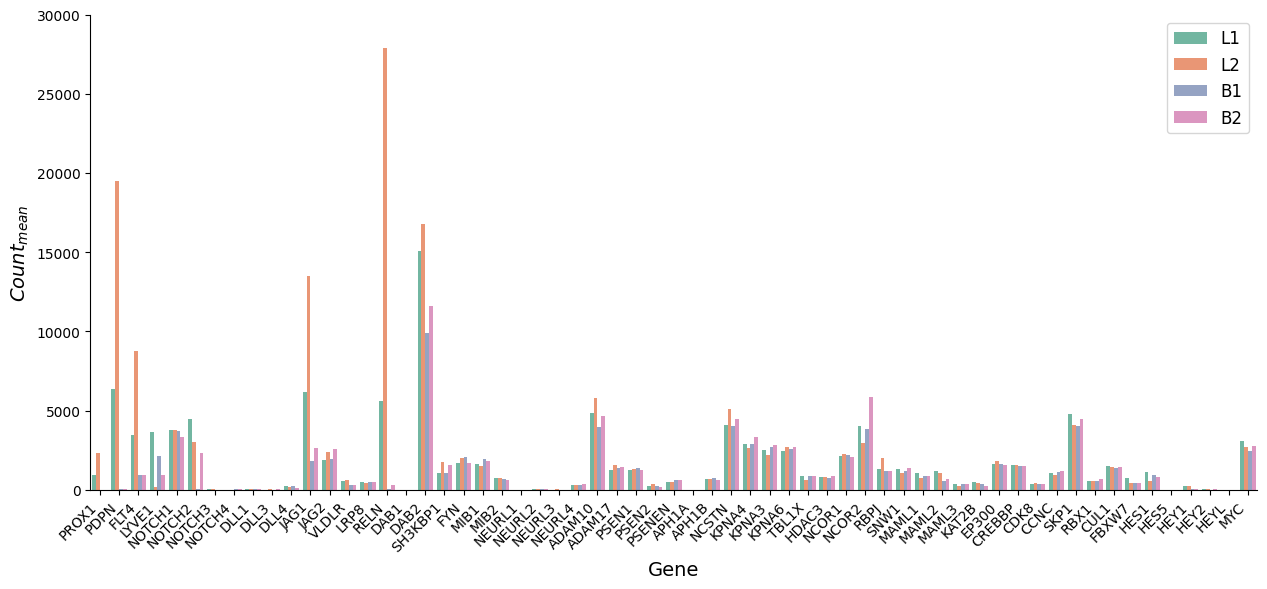

,Gene,Condition,Mean_Count
0,ADAM10,L1,4847.000000
1,ADAM17,L1,1237.333333
2,APH1B,L1,707.000000
3,CCNC,L1,1039.333333
4,CDK8,L1,378.000000
...,...,...,...
219,SH3KBP1,B2,1584.000000
220,SKP1,B2,4495.666667
221,SNW1,B2,1388.000000
222,TBL1X,B2,865.333333


In [51]:
filtered_counts = counts.loc[counts.index.intersection(gene_nodes)]

conditions = {
    "L1": ['ECFC-L1-rep1', 'ECFC-L1-rep2', 'ECFC-L1-rep3'],
    "L2": ['ECFC-L2-rep1', 'ECFC-L2-rep2', 'ECFC-L2-rep3'],
    "B1": ['ECFC-B1-rep1', 'ECFC-B1-rep2', 'ECFC-B1-rep3'],
    "B2": ['ECFC-B2-rep1', 'ECFC-B2-rep2', 'ECFC-B2-rep3']
}

mean_counts = pd.DataFrame({cond: filtered_counts[samples].mean(axis=1) for cond, samples in conditions.items()})
mean_counts["Gene"] = mean_counts.index
melted = mean_counts.melt(id_vars="Gene", var_name="Condition", value_name="Mean_Count")

plt.figure(figsize=(16, 10))
g = sns.catplot(
    data=melted, x="Gene", y="Mean_Count", hue="Condition", kind="bar",
    height=6, aspect=2, palette="Set2", order=gene_nodes
)
g.set_xticklabels(rotation=45, ha='right', fontsize=10)
g.set_yticklabels(fontsize=10)
g.set_axis_labels("Gene", r"$Count_{mean}$", fontsize=14)
g._legend.remove()
plt.legend(fontsize=12, loc='best')
plt.tight_layout()
plt.show()
melted

<Figure size 1600x1000 with 0 Axes>

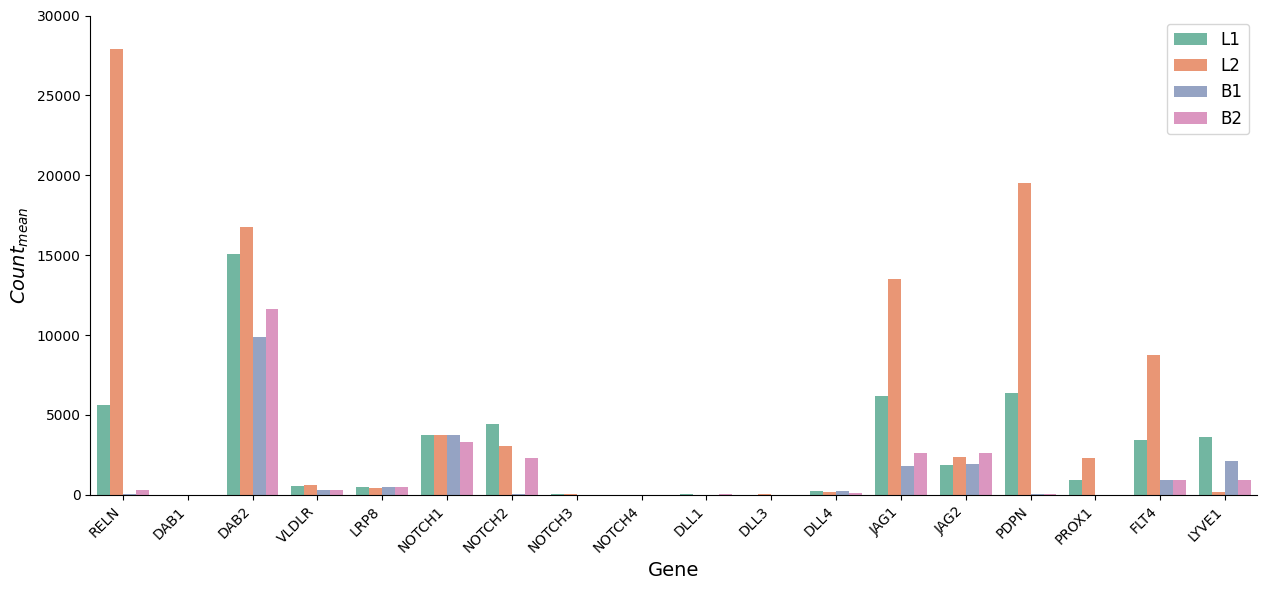

In [52]:
few_gene_nodes = ["RELN", "DAB1", "DAB2", "VLDLR", "LRP8", 
                  "NOTCH1", "NOTCH2", "NOTCH3", "NOTCH4", 
                  "DLL1", "DLL3", "DLL4", "JAG1", "JAG2", 
                  "PDPN", "PROX1", "FLT4", "LYVE1"]

plt.figure(figsize=(16, 10))
g = sns.catplot(
    data=melted, x="Gene", y="Mean_Count", hue="Condition", kind="bar",
    height=6, aspect=2, palette="Set2", order=few_gene_nodes
)
g.set_xticklabels(rotation=45, ha='right', fontsize=10)
g.set_yticklabels(fontsize=10)
g.set_axis_labels("Gene", r"$Count_{mean}$", fontsize=14)
g._legend.remove()
plt.tight_layout()
plt.legend(fontsize=12, loc='best')
plt.show()

<span style="color:red">Commentary</span>: Raw read counts alone are not sufficient to compare expression levels among samples, as these values are affected by factors such as transcript length, total number of reads, and sequencing biases. https://genomebiology.biomedcentral.com/articles/10.1186/s13059-016-0881-8 (doi: 10.1186/s13059-016-0881-8). But the counts show that DAB1 is not expressed in the dataset.

## 1st method: normalize by the highest value for each sample

In [53]:
normalized_counts = counts.divide(counts.max())
max_indices = counts.idxmax()  

print('Genes having the highest counts per sample:\n')
for sample in counts.columns:
    gene = max_indices[sample]
    value = counts.at[gene, sample]
    print(f"{sample}: {gene} (Count value: {value:.3f})")
    
lec_markers = ['PROX1', 'PDPN', 'LYVE1', 'FLT4']

print('\nRaw counts for LEC markers:\n')
for gene in lec_markers:
    if gene in counts.index:
        values = counts.loc[gene]
        print(f"{gene}:")
        for sample, value in values.items():
            print(f"  {sample}: {value:.3f}")
    else:
        print(f"{gene}: not found in counts")

Genes having the highest counts per sample:

ECFC-L1-rep1: SERPINE1 (Count value: 259176.000)
ECFC-L1-rep2: SERPINE1 (Count value: 349443.000)
ECFC-L1-rep3: MT-CO1 (Count value: 239243.000)
ECFC-B1-rep1: VIM (Count value: 220478.000)
ECFC-B1-rep2: VIM (Count value: 307324.000)
ECFC-B1-rep3: VIM (Count value: 249226.000)
ECFC-B2-rep1: SERPINE1 (Count value: 305248.000)
ECFC-B2-rep2: SERPINE1 (Count value: 214422.000)
ECFC-B2-rep3: SERPINE1 (Count value: 289461.000)
ECFC-L2-rep1: FN1 (Count value: 368133.000)
ECFC-L2-rep2: MT-CO1 (Count value: 325196.000)
ECFC-L2-rep3: MT-CO1 (Count value: 335856.000)

Raw counts for LEC markers:

PROX1:
  ECFC-L1-rep1: 685.000
  ECFC-L1-rep2: 519.000
  ECFC-L1-rep3: 1556.000
  ECFC-B1-rep1: 6.000
  ECFC-B1-rep2: 8.000
  ECFC-B1-rep3: 21.000
  ECFC-B2-rep1: 6.000
  ECFC-B2-rep2: 6.000
  ECFC-B2-rep3: 12.000
  ECFC-L2-rep1: 2048.000
  ECFC-L2-rep2: 2534.000
  ECFC-L2-rep3: 2324.000
PDPN:
  ECFC-L1-rep1: 4681.000
  ECFC-L1-rep2: 7926.000
  ECFC-L1-rep3: 65

<span style="color:red">Commentary</span>: Normalizing each sample independently by its highest expression value results in non-interpretable outputs, particularly for genes with relatively low expression. This approach causes lymphatic endothelial cell (LEC) markers such as PDPN, PROX1, LYVE-1, and FLT4 to appear artificially suppressed, often approaching zero. Consequently, this method fails to reflect the actual biological variability or relative gene activity between samples. Moreover, it cannot provide meaningful insights into the likelihood of a gene being transcriptionally active or inactive, as the normalization distorts the relative expression landscape across the dataset.


## 2nd method: normalize by the highest value for each sample conserving only the genes related to the map

In [54]:
counts_2nd = counts.loc[counts.index.intersection(gene_nodes)]
counts_2nd


,ECFC-L1-rep1,ECFC-L1-rep2,ECFC-L1-rep3,ECFC-B1-rep1,ECFC-B1-rep2,ECFC-B1-rep3,ECFC-B2-rep1,ECFC-B2-rep2,ECFC-B2-rep3,ECFC-L2-rep1,ECFC-L2-rep2,ECFC-L2-rep3
Symbol,,,,,,,,,,,,
ADAM10,4403,6276,3862,3774,3709,4434,4059,3885,5992,5510,5788,6110
ADAM17,1111,1503,1098,1261,1281,1596,1024,1301,1975,1209,1551,1887
APH1B,617,786,718,541,739,930,586,610,699,541,715,705
CCNC,771,1049,1298,979,1039,1428,1137,1174,1306,726,932,1072
CDK8,283,393,458,306,330,385,318,376,462,384,479,487
CREBBP,1449,1907,1351,1587,1183,1704,1406,1099,2051,1346,1599,1770
CUL1,1228,1756,1532,1191,1292,1589,1325,1322,1737,1269,1559,1484
DAB2,13027,16866,15306,8557,12194,8971,10360,10996,13534,15097,16350,18813
DLL1,18,30,23,10,6,33,7,27,31,14,21,15


In [55]:
normalized_counts = counts_2nd.divide(counts_2nd.max(), axis=1)
max_indices = counts_2nd.idxmax() 

print('Genes having the highest counts per sample:\n')
for sample in counts.columns:
    gene = max_indices[sample]
    value = counts.at[gene, sample]
    print(f"{sample}: {gene} (Count value: {value:.3f})")
    
normalized_counts

Genes having the highest counts per sample:

ECFC-L1-rep1: DAB2 (Count value: 13027.000)
ECFC-L1-rep2: DAB2 (Count value: 16866.000)
ECFC-L1-rep3: DAB2 (Count value: 15306.000)
ECFC-B1-rep1: DAB2 (Count value: 8557.000)
ECFC-B1-rep2: DAB2 (Count value: 12194.000)
ECFC-B1-rep3: DAB2 (Count value: 8971.000)
ECFC-B2-rep1: DAB2 (Count value: 10360.000)
ECFC-B2-rep2: DAB2 (Count value: 10996.000)
ECFC-B2-rep3: DAB2 (Count value: 13534.000)
ECFC-L2-rep1: RELN (Count value: 21224.000)
ECFC-L2-rep2: RELN (Count value: 32269.000)
ECFC-L2-rep3: RELN (Count value: 30216.000)


,ECFC-L1-rep1,ECFC-L1-rep2,ECFC-L1-rep3,ECFC-B1-rep1,ECFC-B1-rep2,ECFC-B1-rep3,ECFC-B2-rep1,ECFC-B2-rep2,ECFC-B2-rep3,ECFC-L2-rep1,ECFC-L2-rep2,ECFC-L2-rep3
Symbol,,,,,,,,,,,,
ADAM10,0.337990,0.372110,0.252319,0.441042,0.304166,0.494259,0.391795,0.353310,0.442737,0.259612,0.179367,0.202211
ADAM17,0.085284,0.089114,0.071737,0.147365,0.105052,0.177907,0.098842,0.118316,0.145929,0.056964,0.048065,0.062450
APH1B,0.047363,0.046603,0.046910,0.063223,0.060604,0.103667,0.056564,0.055475,0.051648,0.025490,0.022157,0.023332
CCNC,0.059185,0.062196,0.084803,0.114409,0.085206,0.159180,0.109749,0.106766,0.096498,0.034207,0.028882,0.035478
CDK8,0.021724,0.023301,0.029923,0.035760,0.027062,0.042916,0.030695,0.034194,0.034136,0.018093,0.014844,0.016117
CREBBP,0.111231,0.113068,0.088266,0.185462,0.097015,0.189945,0.135714,0.099945,0.151544,0.063419,0.049552,0.058578
CUL1,0.094266,0.104115,0.100091,0.139184,0.105954,0.177126,0.127896,0.120226,0.128343,0.059791,0.048313,0.049113
DAB2,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.711317,0.506678,0.622617
DLL1,0.001382,0.001779,0.001503,0.001169,0.000492,0.003679,0.000676,0.002455,0.002291,0.000660,0.000651,0.000496


<span style="color:red">Commentary</span>: Normalizing each sample independently by its maximum expression value distorts the biological relevance of the data, especially when applied to input state initialization in a Boolean model. This method disproportionately downscales moderately or even highly expressed model-relevant genes when a few unrelated genes dominate the expression profile. As a result, critical regulators such as NOTCH1 or RELN receive artificially low probabilities, failing to represent their true biological activity. This compression of expression values toward zero also hampers the ability to distinguish active from inactive states across samples. Therefore, this normalization strategy is unsuitable for defining biologically meaningful initial conditions in MaBoSS simulations and was excluded from further analysis.

## Use log2 to reduce difference of expression

In [56]:
import numpy as np

In [57]:
counts_log2 = np.log2(counts + 1)
counts_log2

,ECFC-L1-rep1,ECFC-L1-rep2,ECFC-L1-rep3,ECFC-B1-rep1,ECFC-B1-rep2,ECFC-B1-rep3,ECFC-B2-rep1,ECFC-B2-rep2,ECFC-B2-rep3,ECFC-L2-rep1,ECFC-L2-rep2,ECFC-L2-rep3
Symbol,,,,,,,,,,,,
1-Mar,6.507795,7.076816,6.781360,5.426265,4.954196,5.554589,6.807355,5.906891,5.554589,5.209453,5.614710,5.727920
1-Sep,3.169925,3.000000,3.807355,1.584963,2.321928,3.000000,3.584963,2.807355,3.459432,3.321928,3.321928,2.584963
10-Sep,11.100662,11.528942,11.400879,11.076816,11.169299,11.612868,10.997885,10.901621,11.304922,11.170551,11.490851,11.514221
11-Sep,12.218563,12.582612,12.634811,12.489095,12.624795,12.716605,12.159871,12.486081,12.934244,13.057992,13.375039,13.458150
15-Sep,10.949827,11.594791,11.659550,10.772315,11.260920,11.347068,11.044394,11.122828,11.262682,10.982281,11.355351,11.475733
...,...,...,...,...,...,...,...,...,...,...,...,...
ZZZ3,9.903882,10.231221,10.173677,9.654636,9.612868,10.083479,9.851749,9.714246,10.051209,9.632995,9.915879,10.045760
hsa-mir-146a,5.285402,6.523562,6.768184,5.169925,5.977280,6.266787,5.584963,6.022368,6.066089,6.727920,7.531381,7.087463
hsa-mir-3654,10.530406,11.038919,11.040290,10.386940,10.605480,11.095397,10.293472,10.678600,10.965784,10.388017,10.690871,10.884934


<Figure size 1600x1000 with 0 Axes>

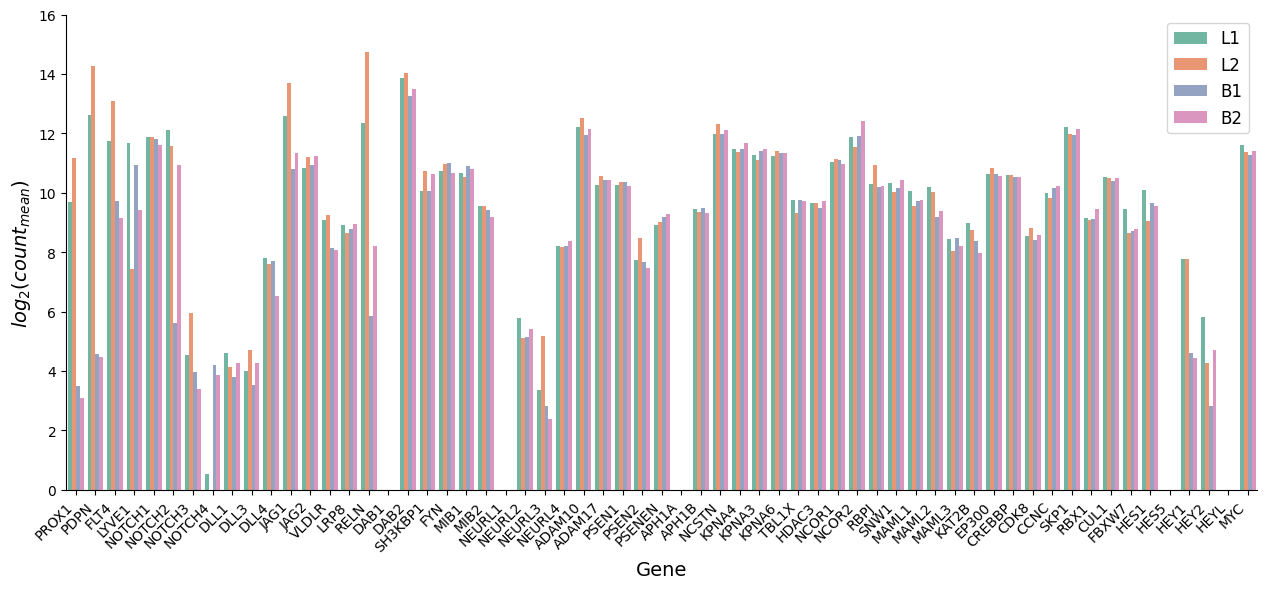

In [58]:
filtered_counts_log2 = counts_log2.loc[counts_log2.index.intersection(gene_nodes)]

conditions = {
    "L1": ['ECFC-L1-rep1', 'ECFC-L1-rep2', 'ECFC-L1-rep3'],
    "L2": ['ECFC-L2-rep1', 'ECFC-L2-rep2', 'ECFC-L2-rep3'],
    "B1": ['ECFC-B1-rep1', 'ECFC-B1-rep2', 'ECFC-B1-rep3'],
    "B2": ['ECFC-B2-rep1', 'ECFC-B2-rep2', 'ECFC-B2-rep3']
}

mean_counts_log2 = pd.DataFrame({cond: filtered_counts_log2[samples].mean(axis=1) for cond, samples in conditions.items()})
mean_counts_log2["Gene"] = mean_counts_log2.index
melted_log2 = mean_counts_log2.melt(id_vars="Gene", var_name="Condition", value_name="Mean_Count")

plt.figure(figsize=(16, 10))
g = sns.catplot(
    data=melted_log2, x="Gene", y="Mean_Count", hue="Condition", kind="bar",
    height=6, aspect=2, palette="Set2", order=gene_nodes
)
g.set_xticklabels(rotation=45, ha='right', fontsize=10)
g.set_yticklabels(fontsize=10)
g.set_axis_labels("Gene", r"$log_2$($count_{mean}$)", fontsize=14)
g._legend.remove()
plt.legend(fontsize=12, loc='best')
plt.tight_layout()
plt.show()

<Figure size 1600x1000 with 0 Axes>

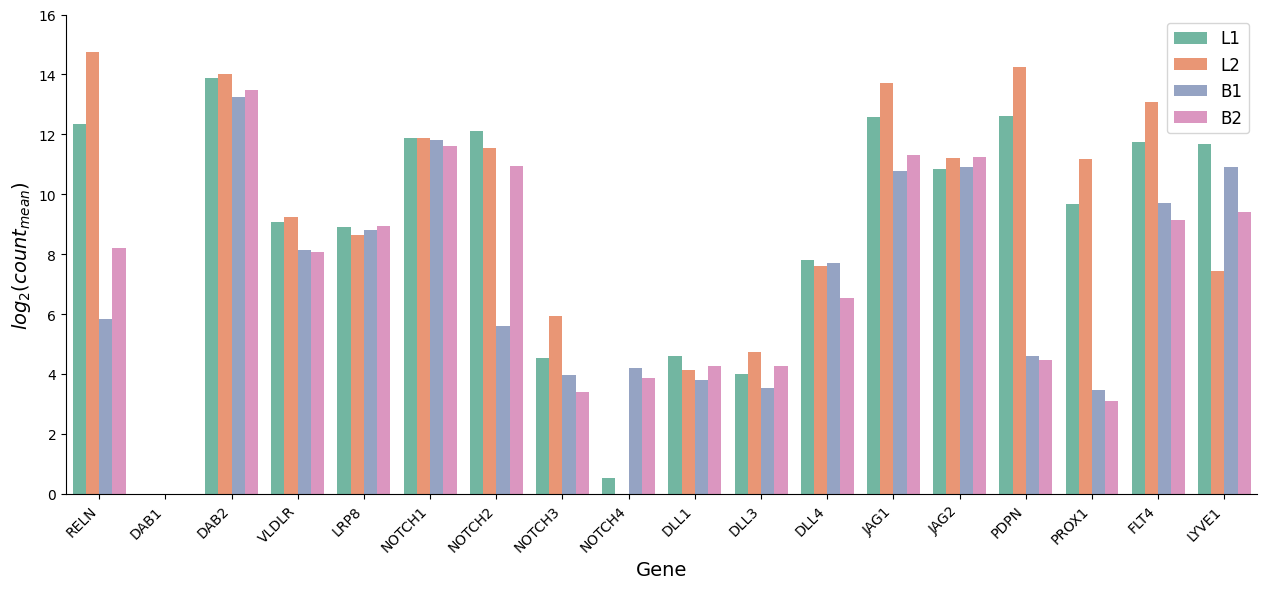

In [59]:
few_gene_nodes = ["RELN", "DAB1", "DAB2", "VLDLR", "LRP8", 
                  "NOTCH1", "NOTCH2", "NOTCH3", "NOTCH4", 
                  "DLL1", "DLL3", "DLL4", "JAG1", "JAG2", 
                  "PDPN", "PROX1", "FLT4", "LYVE1"]

plt.figure(figsize=(16, 10))
g = sns.catplot(
    data=melted_log2, x="Gene", y="Mean_Count", hue="Condition", kind="bar",
    height=6, aspect=2, palette="Set2", order=few_gene_nodes
)
g.set_xticklabels(rotation=45, ha='right', fontsize=10)
g.set_yticklabels(fontsize=10)
g.set_axis_labels("Gene", r"$log_2$($count_{mean}$)", fontsize=14)
g._legend.remove()
plt.tight_layout()
plt.legend(fontsize=12, loc='best')
plt.show()

## 3rd method: normalizing using DESeq2 (as done by Ahmed) --> Inter sample comparison not within sample comparison

In [60]:
from pydeseq2.dds import DeseqDataSet
import pandas as pd
import os

In [61]:
counts_T = counts.T

metadata = pd.DataFrame(zip(counts_T.index, ['L1', 'L1', 'L1',
                                           'B1', 'B1', 'B1',
                                           'B2', 'B2', 'B2',
                                           'L2', 'L2', 'L2']), 
                        columns = ['Sample', 'Condition'])

metadata = metadata.set_index('Sample')

GSE_name = "GSE54416"
os.makedirs(f"{GSE_name}_outputs", exist_ok=True)
metadata.to_csv(r'.\GSE54416_outputs\GSE54416_DESq2_metadata.csv', sep=',')

metadata

,Condition
Sample,
ECFC-L1-rep1,L1
ECFC-L1-rep2,L1
ECFC-L1-rep3,L1
ECFC-B1-rep1,B1
ECFC-B1-rep2,B1
ECFC-B1-rep3,B1
ECFC-B2-rep1,B2
ECFC-B2-rep2,B2
ECFC-B2-rep3,B2


In [62]:
dds = DeseqDataSet(counts=counts_T, metadata=metadata, design_factors='Condition')
dds.deseq2()
dds

C:\Users\Yanis\AppData\Local\Temp\ipykernel_2704\1947885380.py:1: DeprecationWarning: design_factors is deprecated and will soon be removed.Please consider providing a formulaic formula using the design argumentinstead.
  dds = DeseqDataSet(counts=counts_T, metadata=metadata, design_factors='Condition')
Fitting size factors...
... done in 0.01 seconds.



Using None as control genes, passed at DeseqDataSet initialization


Fitting dispersions...
... done in 1.24 seconds.

Fitting dispersion trend curve...
... done in 0.24 seconds.

Fitting MAP dispersions...
... done in 1.63 seconds.

Fitting LFCs...
... done in 1.11 seconds.

Calculating cook's distance...
... done in 0.01 seconds.

Replacing 0 outlier genes.



AnnData object with n_obs × n_vars = 12 × 13830
    obs: 'Condition'
    uns: 'trend_coeffs', 'disp_function_type', '_squared_logres', 'prior_disp_var'
    obsm: 'design_matrix', 'size_factors', '_mu_LFC', '_hat_diagonals', 'replaceable'
    varm: '_normed_means', 'non_zero', '_MoM_dispersions', 'genewise_dispersions', '_genewise_converged', 'fitted_dispersions', 'MAP_dispersions', '_MAP_converged', 'dispersions', '_outlier_genes', 'LFC', '_LFC_converged', 'replaced', 'refitted', '_pvalue_cooks_outlier'
    layers: 'normed_counts', '_mu_hat', 'cooks'

In [63]:
import numpy as np

In [64]:
normed_counts_df = pd.DataFrame(
    dds.layers['normed_counts'].T,
    index=dds.var_names,
    columns=dds.obs_names
)

normed_counts_df = normed_counts_df.loc[normed_counts_df.index.intersection(gene_nodes)]
normed_counts_df.to_csv(r'.\GSE54416_outputs\GSE54416_DESeq2_norm.csv', sep=',')
normed_counts_df

Sample,ECFC-L1-rep1,ECFC-L1-rep2,ECFC-L1-rep3,ECFC-B1-rep1,ECFC-B1-rep2,ECFC-B1-rep3,ECFC-B2-rep1,ECFC-B2-rep2,ECFC-B2-rep3,ECFC-L2-rep1,ECFC-L2-rep2,ECFC-L2-rep3
Symbol,,,,,,,,,,,,
ADAM10,5211.717063,5198.830928,3601.605143,4228.243875,3925.407624,3849.233667,4235.716815,4052.442660,5138.122850,6253.711362,5778.618701,5782.122056
ADAM17,1315.061925,1245.035514,1023.967490,1412.775709,1355.742024,1385.515772,1068.581921,1357.072819,1693.556847,1372.184580,1548.486110,1785.738841
APH1B,730.326920,651.096416,669.588942,606.115510,782.118154,807.349416,611.512701,636.290868,599.390499,614.021388,713.841115,667.167929
CCNC,912.612731,868.956922,1210.482516,1096.833798,1099.622141,1239.672006,1186.501606,1224.599146,1119.891262,823.991733,930.489397,1014.473788
CDK8,334.979770,325.548208,427.119408,342.830584,349.254386,334.225296,331.844776,392.205519,396.163678,435.830338,478.223628,460.866357
CREBBP,1715.143771,1579.695758,1259.908997,1778.013521,1252.024055,1479.272478,1467.213068,1146.366662,1758.726630,1527.676133,1596.408311,1675.017355
CUL1,1453.551795,1454.612350,1428.705095,1334.350412,1367.383837,1379.438948,1382.686568,1378.977914,1489.472528,1440.283071,1556.473144,1404.364833
DAB2,15419.722501,13971.236844,14273.994903,9586.932389,12905.478718,7787.883452,10811.043657,11469.925221,11605.366263,17134.715142,16323.499614,17803.447174
DLL1,21.306134,24.851008,21.449228,11.203614,6.350080,28.647883,7.304759,28.163694,26.582411,15.889648,20.965963,14.195062


<Figure size 1600x1000 with 0 Axes>

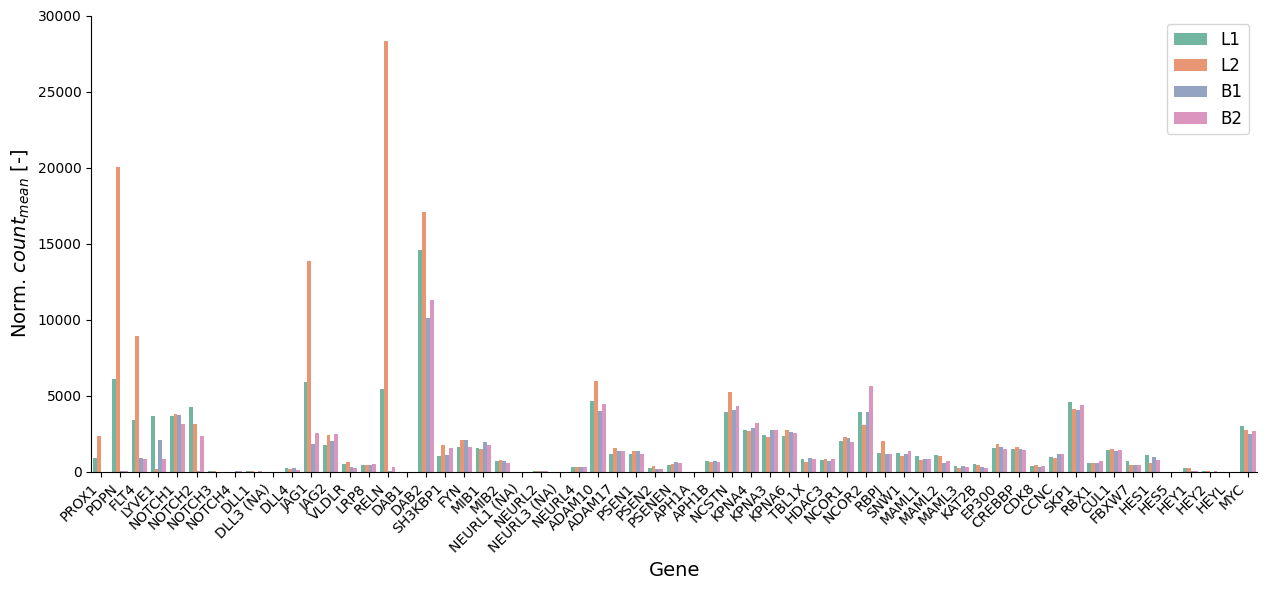

,Gene,Condition,Mean_Count
0,ADAM10,L1,4847.000000
1,ADAM17,L1,1237.333333
2,APH1B,L1,707.000000
3,CCNC,L1,1039.333333
4,CDK8,L1,378.000000
...,...,...,...
219,SH3KBP1,B2,1584.000000
220,SKP1,B2,4495.666667
221,SNW1,B2,1388.000000
222,TBL1X,B2,865.333333


In [65]:
conditions = {
    "L1": ['ECFC-L1-rep1', 'ECFC-L1-rep2', 'ECFC-L1-rep3'],
    "L2": ['ECFC-L2-rep1', 'ECFC-L2-rep2', 'ECFC-L2-rep3'],
    "B1": ['ECFC-B1-rep1', 'ECFC-B1-rep2', 'ECFC-B1-rep3'],
    "B2": ['ECFC-B2-rep1', 'ECFC-B2-rep2', 'ECFC-B2-rep3']
}

mean_counts_norm = pd.DataFrame({cond: normed_counts_df[samples].mean(axis=1) for cond, samples in conditions.items()})
mean_counts_norm["Gene"] = mean_counts_norm.index
mean_counts_norm["Gene"] = mean_counts_norm["Gene"].replace({
    "APH1A": "APH1A (NA)",
    "NEURL1": "NEURL1 (NA)",
    "DAB1": "DAB1 (NA)"
})

melted_norm = mean_counts_norm.melt(id_vars="Gene", var_name="Condition", value_name="Mean_Count")
gene_nodes = [gene if gene not in ["DLL3", "NEURL1", "NEURL3"]
              else f"{gene} (NA)" for gene in gene_nodes]

plt.figure(figsize=(16, 10))
g = sns.catplot(
    data=melted_norm, x="Gene", y="Mean_Count", hue="Condition", kind="bar",
    height=6, aspect=2, palette="Set2", order=gene_nodes
)
g.set_xticklabels(rotation=45, ha='right', fontsize=10)
g.set_yticklabels(fontsize=10)
g.set_axis_labels("Gene", r"Norm. $count_{mean}$ [-]", fontsize=14)
g._legend.remove()
plt.legend(fontsize=12, loc='best')
plt.tight_layout()
plt.savefig(r'.\GSE54416_outputs\GSE54416_DESeq2_norm_mean_counts.png', dpi=600)
plt.show()
melted

<Figure size 1600x1000 with 0 Axes>

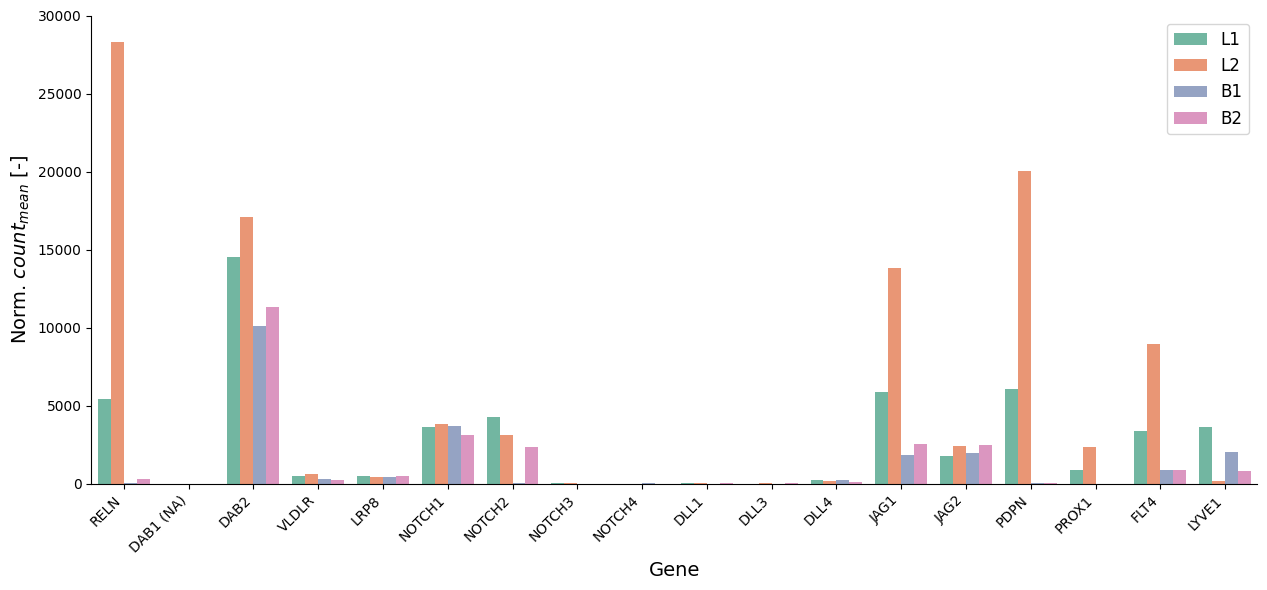

In [66]:
few_gene_nodes = ["RELN", "DAB1 (NA)", "DAB2", "VLDLR", "LRP8", 
                  "NOTCH1", "NOTCH2", "NOTCH3", "NOTCH4", 
                  "DLL1", "DLL3", "DLL4", "JAG1", "JAG2", 
                  "PDPN", "PROX1", "FLT4", "LYVE1"]

plt.figure(figsize=(16, 10))
g = sns.catplot(
    data=melted_norm, x="Gene", y="Mean_Count", hue="Condition", kind="bar",
    height=6, aspect=2, palette="Set2", order=few_gene_nodes
)
g.set_xticklabels(rotation=45, ha='right', fontsize=10)
g.set_yticklabels(fontsize=10)
g.set_axis_labels("Gene", r"Norm. $count_{mean}$ [-]", fontsize=14)
g._legend.remove()
plt.tight_layout()
plt.legend(fontsize=12, loc='best')
plt.savefig(r'.\GSE54416_outputs\GSE54416_DESeq2_norm_mean_counts_few_genes.png', dpi=600)
plt.show()

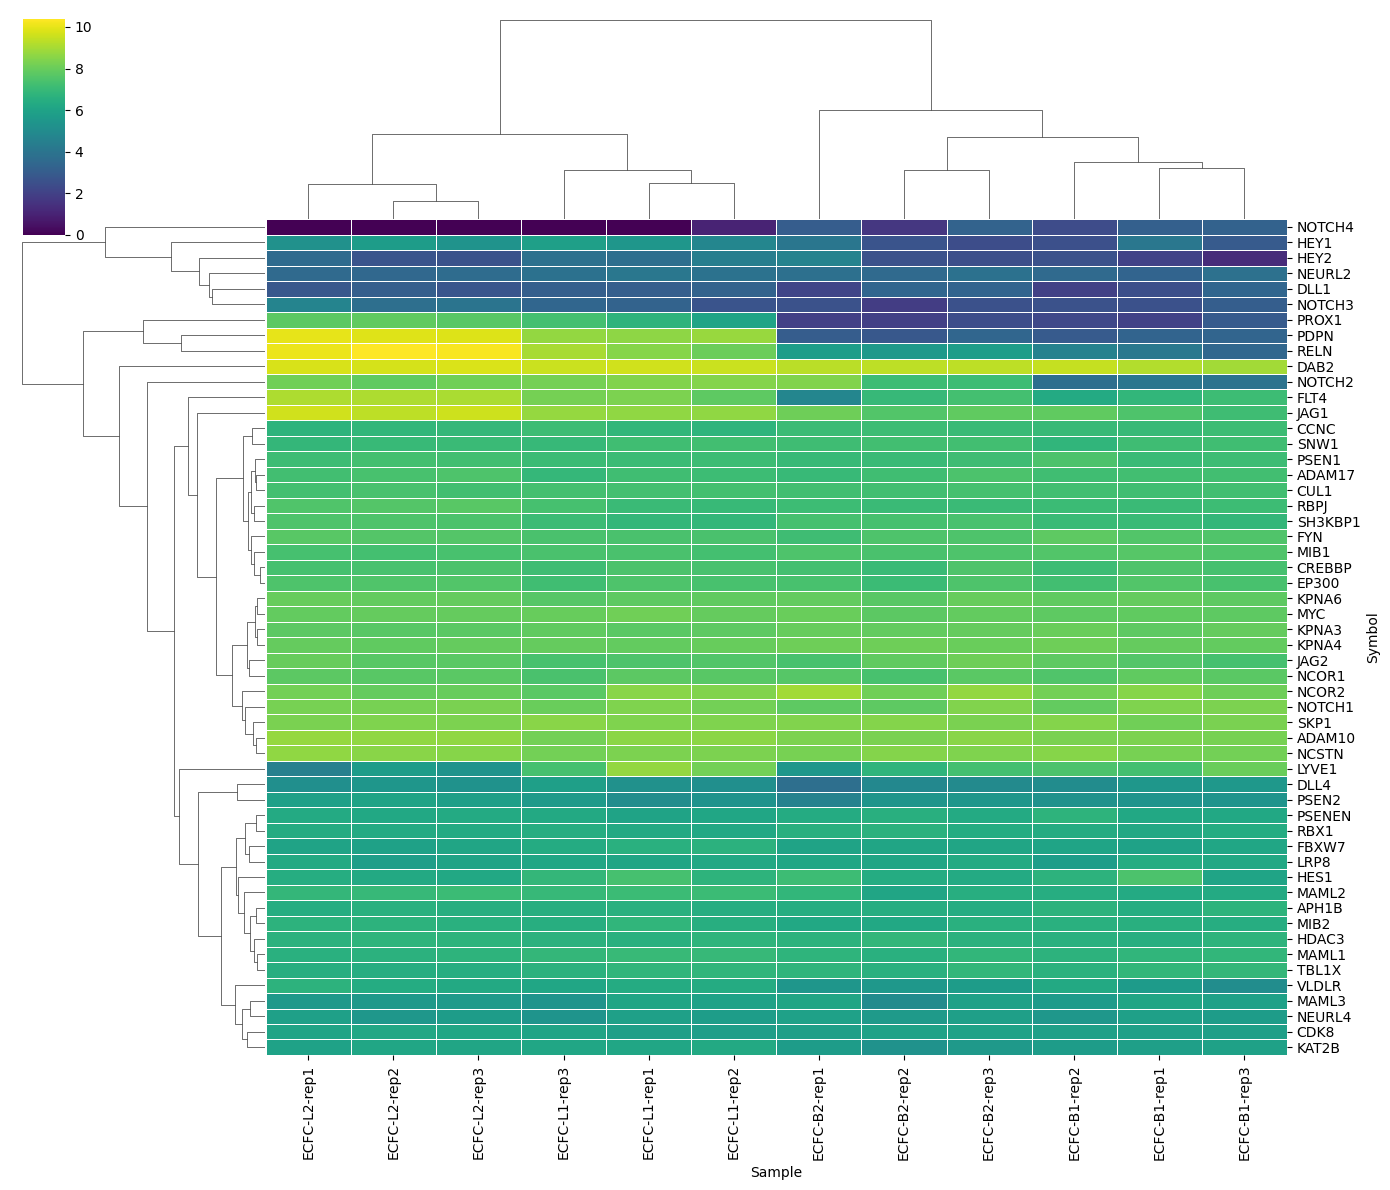

In [67]:
dds.layers['log1p'] = np.log1p(dds.layers['normed_counts'])

dds_signs = dds[:, dds.var_names.isin(gene_nodes)]
grapher = pd.DataFrame(dds_signs.layers['log1p'].T, index=dds_signs.var_names, columns=dds_signs.obs_names)

g = sns.clustermap(grapher, cmap='viridis', figsize=(14, 12), 
                   cbar_pos=(0.02, 0.8, 0.03, 0.18),
                   linewidths=0.5, col_cluster=True, row_cluster=True,
                   yticklabels=True, xticklabels=True)
g.fig.savefig(r".\GSE54416_outputs\GSE54416_DESEq2_log1p.png", dpi=600)


In [68]:
log2_normed_counts = np.log2(dds.layers['normed_counts'] + 1)

log2_normed_counts_df = pd.DataFrame(
    log2_normed_counts.T,
    index=dds.var_names,
    columns=dds.obs_names
)

log2_normed_counts_df = log2_normed_counts_df.loc[log2_normed_counts_df.index.intersection(gene_nodes)]
log2_normed_counts_df.to_csv(r'.\GSE54416_outputs\GSE54416_DESeq2_log2_norm.csv', sep=',')

log2_normed_counts_df

Sample,ECFC-L1-rep1,ECFC-L1-rep2,ECFC-L1-rep3,ECFC-B1-rep1,ECFC-B1-rep2,ECFC-B1-rep3,ECFC-B2-rep1,ECFC-B2-rep2,ECFC-B2-rep3,ECFC-L2-rep1,ECFC-L2-rep2,ECFC-L2-rep3
Symbol,,,,,,,,,,,,
ADAM10,12.347820,12.344249,11.814825,12.046184,11.938994,11.910730,12.048731,11.984932,12.327306,12.610728,12.496759,12.497633
ADAM17,10.362012,10.283129,10.001362,10.465338,10.405931,10.437248,10.062831,10.407345,10.726692,10.423310,10.597574,10.803113
APH1B,9.514373,9.348941,9.389285,9.245827,9.613086,9.658835,9.258596,9.315808,9.229757,9.264493,9.481479,9.384067
CCNC,9.835439,9.764800,10.242558,10.100444,10.104104,10.276906,10.213714,10.259271,10.130431,9.688236,9.863396,9.987937
CDK8,8.392231,8.351152,8.741869,8.425554,8.452259,8.388987,8.378706,8.619140,8.633590,8.770929,8.904555,8.851332
CREBBP,10.744955,10.626344,10.300248,10.796862,10.291198,10.531647,10.519846,10.164111,10.781136,10.578067,10.641517,10.710821
CUL1,10.506359,10.507410,10.481502,10.383003,10.418257,10.430911,10.434301,10.430429,10.541554,10.493138,10.604992,10.456729
DAB2,13.912583,13.770275,13.801203,13.227004,13.655808,12.927201,13.400352,13.485694,13.502629,14.064719,13.994751,14.119950
DLL1,4.479369,4.692149,4.488594,3.609237,2.877760,4.889857,3.053938,4.866102,4.785677,4.078067,4.457198,3.925531


In [69]:
dds.varm['LFC']

,Intercept,Condition[T.B2],Condition[T.L1],Condition[T.L2]
Symbol,,,,
1-Mar,3.677531,0.598552,0.989776,0.152407
1-Sep,1.452680,0.718190,0.752679,0.615961
10-Sep,7.834250,-0.184984,-0.001754,0.085823
11-Sep,8.751711,-0.082059,-0.130170,0.489276
15-Sep,7.728365,-0.027114,0.150075,0.109596
...,...,...,...,...
ZZZ3,6.791995,0.027687,0.180440,0.069476
hsa-mir-146a,4.045348,0.005661,0.260059,0.921831
hsa-mir-3654,7.428066,-0.064477,0.077600,-0.017780


In [70]:
log2fc = dds.varm['LFC']['Condition[T.L1]']

results_df = pd.DataFrame({
    'log2FoldChange': log2fc
}, index=dds.var_names)

filtered_df = results_df[np.abs(results_df['log2FoldChange']) > 1]
filtered_df = filtered_df.loc[filtered_df.index.intersection(gene_nodes)] # Shows the log2 FC of genes of interest

filtered_df


,log2FoldChange
Symbol,
FLT4,1.332973
HEY1,2.048729
HEY2,2.043939
JAG1,1.160600
NOTCH2,4.467359
NOTCH4,-3.412239
PDPN,5.544897
PROX1,4.365981
RELN,4.449344
